# Read in  / open csv file and model

In [5]:
#Import libraries
import pandas as pd
import pickle

#Read in csv file
df = pd.read_csv("telco_churn_encoded.csv")

#Open the best model's 
model_file_smote = open("telco_churn_best_model_gbc_smote.saved", "rb")
gbc_smote = pickle.load(model_file_smote)
model_file_smote.close()

model_file_under = open("telco_churn_best_model_gbc_under.saved", "rb")
gbc_under = pickle.load(model_file_under)
model_file_under.close()

In [6]:
#Prepare X and y
X = df.drop(columns='churn_value') #Explanatory variables
y = df['churn_value'] #Response variable

In [7]:
#Conduct Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [8]:
#Make predictions for each model
y_pred_smote = gbc_smote.predict(X_test)
y_pred_under = gbc_under.predict(X_test)

# Confusion Matrix

In [5]:
#Import libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

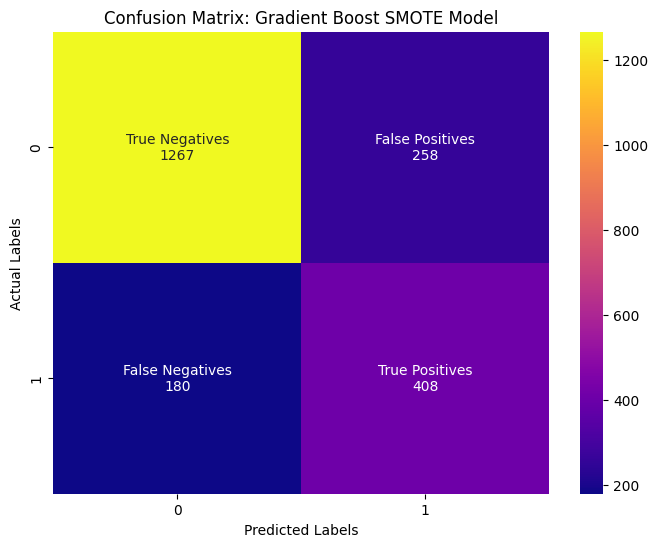

In [7]:
#Display confusion Matrix for smote model

#First initialize confusion matrix
cm = confusion_matrix(y_test, y_pred_smote)

#Extract values: trust postives, trust negatives, etc
tn, fp, fn, tp = cm.ravel()

#Create custom labels
labels = np.asarray([
    [f"True Negatives\n{tn}", f"False Positives\n{fp}"],
    [f"False Negatives\n{fn}", f"True Positives\n{tp}"]
])

#Annote and customize heatmap
plt.figure(figsize=(8,6)) #Set figure size
sns.heatmap(cm, annot=labels, fmt='', cmap='plasma')
plt.title('Confusion Matrix: Gradient Boost SMOTE Model')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

#Initialize class labels to further annotate graph
class_names = [0, 1]

#Initialize tick marks to line up class names appropriately
tick_marks = np.arange(len(class_names))

#Arrange the class labels (0 and 1)
plt.xticks(tick_marks + 0.5, class_names)
plt.yticks(tick_marks + 0.5, class_names, rotation=90) #Align Properly

#Display
plt.show()

**Note:**
I learned how to create a confusion matrix like this (with the labels) by following the code from someone else's github. Here is a link to that person's github: https://github.com/33abhiram/I320D_final_project

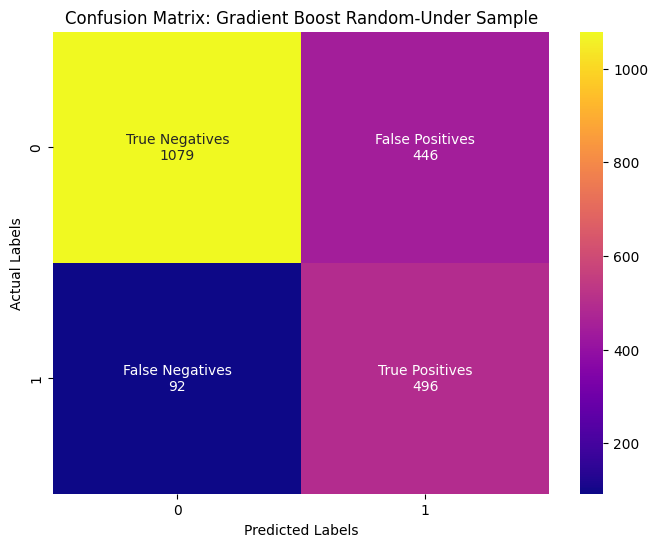

In [8]:
#Display confusion Matrix for random under-sampling model

#First initialize confusion matrix
cm = confusion_matrix(y_test, y_pred_under)

#Extract values: trust postives, trust negatives, etc
tn, fp, fn, tp = cm.ravel()

#Create custom labels
labels = np.asarray([
    [f"True Negatives\n{tn}", f"False Positives\n{fp}"],
    [f"False Negatives\n{fn}", f"True Positives\n{tp}"]
])

#Annote and customize heatmap
plt.figure(figsize=(8,6)) #Set figure size
sns.heatmap(cm, annot=labels, fmt='', cmap='plasma')
plt.title('Confusion Matrix: Gradient Boost Random-Under Sample')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')

#Initialize class labels to further annotate graph
class_names = [0, 1]

#Initialize tick marks to line up class names appropriately
tick_marks = np.arange(len(class_names))

#Arrange the class labels (0 and 1)
plt.xticks(tick_marks + 0.5, class_names)
plt.yticks(tick_marks + 0.5, class_names, rotation=90) #Align Properly

#Display
plt.show()

# Feature Importances

Where I learned to access feature importances: https://www.geeksforgeeks.org/feature-importance-with-random-forests/

## Gradient Boost + SMOTE

C:\Users\KRAyu\AppData\Local\Temp\ipykernel_24468\3159654372.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='Importance', y='Features', data=feature_importances_smote, palette='rocket')


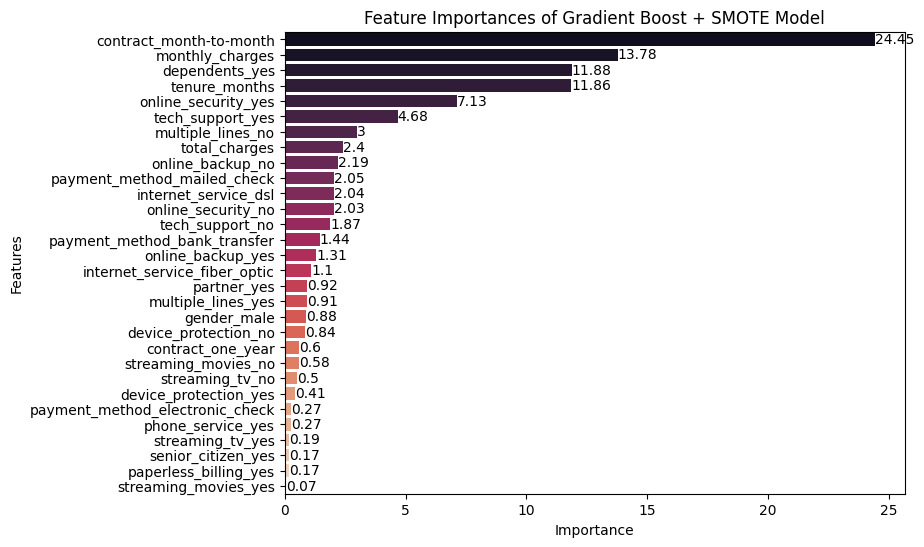

In [24]:
#Extract feature importances from Gradient Boost + SMOTE model
importances_smote = gbc_smote.feature_importances_

#Get feature names
features = X_train.columns

#Display feature importances as a dataframe
feature_importances = pd.DataFrame({
    'Features': features,
    'Importance': importances_smote
})

#Sort in descending order
feature_importances_smote = feature_importances.sort_values(by='Importance', ascending=False)

#Format further
feature_importances_smote['Importance'] = round(feature_importances_smote['Importance'] * 100, 2)

#Visualize using bar plot
plt.figure(figsize=(8,6)) #Set figure size
plot = sns.barplot(x='Importance', y='Features', data=feature_importances_smote, palette='rocket')

#Annotate
plt.title('Feature Importances of Gradient Boost + SMOTE Model')
for i in plot.containers:
    plot.bar_label(i, )

#Display
plt.show()

C:\Users\KRAyu\AppData\Local\Temp\ipykernel_24468\2313420504.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='Importance', y='Features', data=feature_importances_smote_10, palette='rocket')


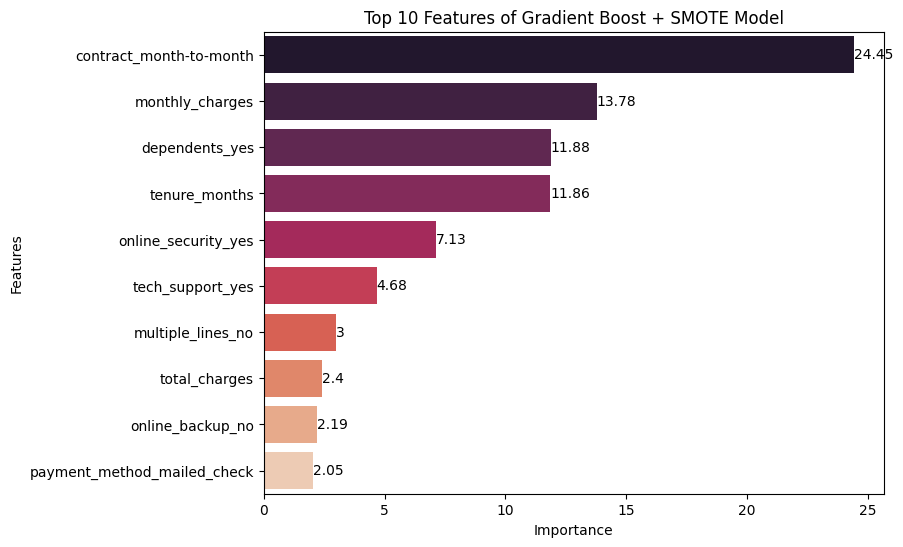

In [25]:
#Redo plot but this time of top 10 features
feature_importances_smote_10 = feature_importances_smote.head(10)

#Visualize using bar plot
plt.figure(figsize=(8,6)) #Set figure size
plot = sns.barplot(x='Importance', y='Features', data=feature_importances_smote_10, palette='rocket')

#Annotate
plt.title('Top 10 Features of Gradient Boost + SMOTE Model')
for i in plot.containers:
    plot.bar_label(i, )

#Display
plt.show()

## Gradient Boost + Random Under-Sampling

C:\Users\KRAyu\AppData\Local\Temp\ipykernel_24468\1728510814.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='Importance', y='Features', data=feature_importances_under, palette='rocket')


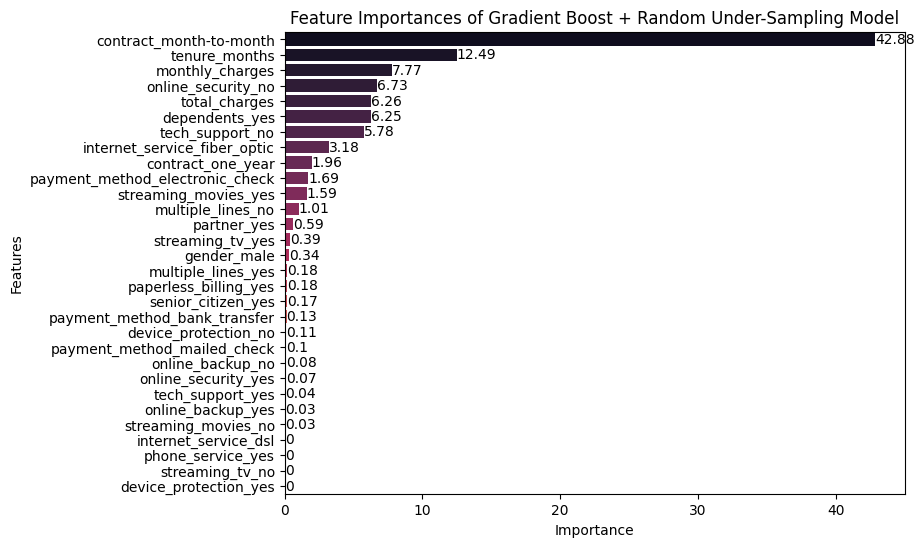

In [28]:
#Extract feature importances from Gradient Boost + SMOTE model
importances_under = gbc_under.feature_importances_

#Get feature names
features = X_train.columns

#Display feature importances as a dataframe
feature_importances = pd.DataFrame({
    'Features': features,
    'Importance': importances_under
})

#Sort in descending order
feature_importances_under = feature_importances.sort_values(by='Importance', ascending=False)

#Format further
feature_importances_under['Importance'] = round(feature_importances_under['Importance'] * 100, 2)

#Visualize using bar plot
plt.figure(figsize=(8,6)) #Set figure size
plot = sns.barplot(x='Importance', y='Features', data=feature_importances_under, palette='rocket')

#Annotate
plt.title('Feature Importances of Gradient Boost + Random Under-Sampling Model')
for i in plot.containers:
    plot.bar_label(i, )

#Display
plt.show()

C:\Users\KRAyu\AppData\Local\Temp\ipykernel_24468\2646919773.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='Importance', y='Features', data=feature_importances_under_10, palette='rocket')


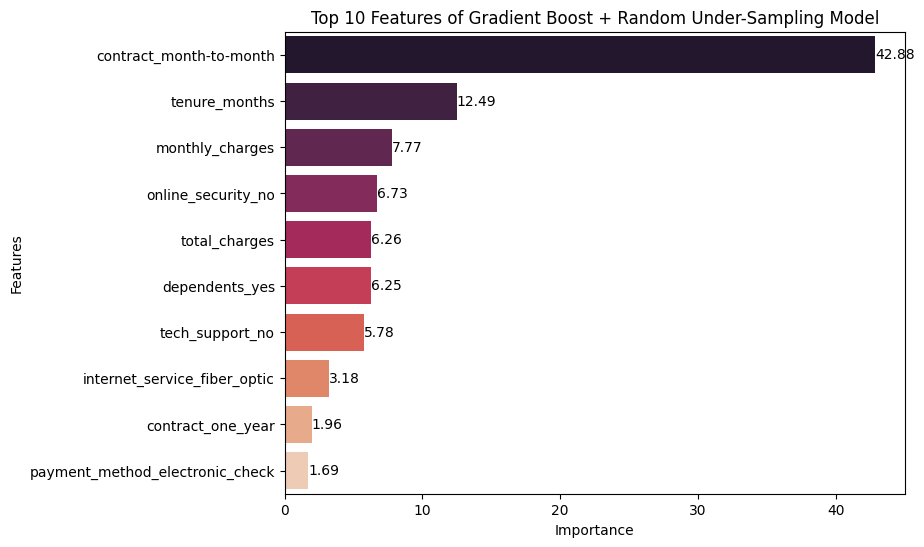

In [27]:
#Redo plot but this time of top 10 features
feature_importances_under_10 = feature_importances_under.head(10)

#Visualize using bar plot
plt.figure(figsize=(8,6)) #Set figure size
plot = sns.barplot(x='Importance', y='Features', data=feature_importances_under_10, palette='rocket')

#Annotate
plt.title('Top 10 Features of Gradient Boost + Random Under-Sampling Model')
for i in plot.containers:
    plot.bar_label(i, )

#Display
plt.show()

## Commonalities between both models

In [ ]:
#Find the common set of features from both models top 10

#Convert both feature importances to lists (Just the feature names)
features_smote = list(feature_importances_smote_10['Features'])
features_under = list(feature_importances_under_10['Features'])

#Define function
def list_intersection(list1, list2):
    
    #Initialize empty list
    common_elem = []

    #Use for loop to iterate through each item in list1
    for elem in list1:
        if elem in list2: #Search for similar elements in list2
            common_elem.append(elem) #Add the common elements from the two lists
    #Print result
    return common_elem

#Deploy function
common_features = list_intersection(features_smote, features_under)


#Iterate through each
for feature in common_features:
    print(feature)

contract_month-to-month
monthly_charges
dependents_yes
tenure_months
total_charges


**Note:** The function used (`list_intersection`), is a function I created previsouly from the first coding assignment of this course. It takes two lists and returns the common elements between the two.  

For more info: 

First I define my function and made sure it takes two parameters, list1 and list2. 

Next I initialize a empty list I called common_elem. The point behind this list is that, it'll hold the common elements from both list1 and list2.  

Following that I use a for loop to iterate through each element('elem') in list1. Then within the for loop I use a if statement. With this if statement I check if any of the elements in list1 are in list2. If there are I add the common elements together using the append function. Afterwards I exit the for loop and print the result. 

# Bias and Fairness Analysis

## Gender

### SMOTE

In [13]:
#Assess model fairness 

#Make a copy of testing dataset to evaluate the model's resutls
df_results = X_test.copy()

#Add predictions to result dataframe
df_results['pred'] = y_pred_smote

#Add the actual results
df_results['actual'] = y_test

#Apply function to return male and female back to "gender_male"
def return_gender(x):
    if x == 1:
        return 'Male'
    else:
        return 'Female'
    
#Apply to result dataframe
df_results['gender_male'] = df_results['gender_male'].apply(return_gender)

#Analyze the differences in results
gender_predicted = df_results.groupby('gender_male')['pred'].mean() * 100
gender_actual = df_results.groupby('gender_male')['actual'].mean() * 100

In [ ]:
#Display for each gender
print('**SMOTE Model**')
print('Predicted Churn Per Gender:\n', gender_predicted)
print('\nActual Churn Per Gender: \n', gender_actual)

**SMOTE Model**
Predicted Churn Per Gender:
 gender_male
Female    33.649289
Male      29.395085
Name: pred, dtype: float64

Actual Churn Per Gender: 
 gender_male
Female    28.720379
Male      26.937618
Name: actual, dtype: float64


Here what I'm doing is a bias analysis. First I make a copy of the features for my testing dataset (`X_test`). Following I create a new column called `pred`, which is the predictions of my gbc + smote model on the copy of the testing data I just made (features only). Next I make another column called `actual`, which is the response/target variable of my testing data. Basically what I've done here is make predictions on my testing data and now I'm comparing it to it's actual value. 

Next I apply a function to return the gender column back to it's normal state (male = 1, female = 0), for easier analysis. 

I use a group by to find the average percentages for each gender. By comparing the two I can analyze to see if there are any differences. 

In [ ]:
#Observe the actual proportion of churns in our full dataset
df.groupby('gender_male')['churn_value'].mean()*100

gender_male
0    26.920872
1    26.160338
Name: churn_value, dtype: float64

Note: 0 = Female, 1 =  Male

From this we can see there was never much a difference in churn by gender in the first place. 

**Takeaways**

It does appear that bias does exist in our SMOTE model. 


- The actual churn rates between males and females (in our full dataset) are very close, with only a slight difference (around 0.76% to 0.78%). However, the model is predicting that females are more likely to churn than males (by 4.3%), even though this difference does not exist in the data.

- This discrepancy suggests that our model may have learned gender-based bias, even though gender does not actually play a significant role in churn. 



### Random Under-Sampling

In [23]:
#Assess model fairness 

#Make a copy of testing dataset to evaluate the model's resutls
df_results2 = X_test.copy()

#Add predictions to result dataframe
df_results2['pred'] = y_pred_under

#Add the actual results
df_results2['actual'] = y_test

#Apply function to return male and female back to "gender_male"
def return_gender(x):
    if x == 1:
        return 'Male'
    else:
        return 'Female'
    
#Apply to result dataframe
df_results2['gender_male'] = df_results2['gender_male'].apply(return_gender)

#Analyze the differences in results
gender_predicted2 = df_results2.groupby('gender_male')['pred'].mean() * 100
gender_actual2 = df_results2.groupby('gender_male')['actual'].mean() * 100

In [26]:
#Display for each gender
print('**Random Under Model**')
print('Predicted Churn Per Gender:\n', gender_predicted2)
print('\nActual Churn Per Gender: \n', gender_actual2)

**Random Under Model**
Predicted Churn Per Gender:
 gender_male
Female    45.876777
Male      43.289225
Name: pred, dtype: float64

Actual Churn Per Gender: 
 gender_male
Female    28.720379
Male      26.937618
Name: actual, dtype: float64


The Random Under model shows clear signs of bias. It overpredicts churn by a large margin for both females and males, but the overprediction is much higher for females (about 17%) compared to males (about 16%). This exaggerates the actual gender gap in churn (from around 2%), suggesting the model may be unfairly associating higher churn risk with being female.

## Senior Citizenship Status

### SMOTE

In [31]:
#Apply function to return male and female back to "gender_male"
def return_senior(x):
    if x == 1:
        return 'Senior'
    else:
        return 'Not a Senior'
    
#Apply to result dataframe
df_results['senior_citizen_yes'] = df_results['senior_citizen_yes'].apply(return_senior)

#Analyze the differences in results
senior_predicted = df_results.groupby('senior_citizen_yes')['pred'].mean() * 100
senior_actual = df_results.groupby('senior_citizen_yes')['actual'].mean() * 100

#Display for each gender
print('**SMOTE Model**')
print('Predicted Churn Per Senior Status:\n', senior_predicted)
print('\nActual Churn Per Senior Status: \n', senior_actual)

**SMOTE Model**
Predicted Churn Per Senior Status:
 senior_citizen_yes
Not a Senior    28.530752
Senior          46.218487
Name: pred, dtype: float64

Actual Churn Per Senior Status: 
 senior_citizen_yes
Not a Senior    24.487472
Senior          44.257703
Name: actual, dtype: float64


Our SMOTE model does not introduce additional bias against seniors it appears. In fact, it keeps the churn gap between seniors and non-seniors fairly close to the actual gap (actual gap: 19.77 points, predicted gap: ~17.69 points).

So while our model slightly overpredicts for both groups, it isn't exaggerating the disparity. This suggests the model is treating senior status more fairly compared to how it treated gender. Overall there appears to be more age related bias. 

### Random Under

In [32]:
#Apply return senior function
df_results2['senior_citizen_yes'] = df_results2['senior_citizen_yes'].apply(return_senior)

#Analyze the differences in results
senior_predicted2 = df_results2.groupby('senior_citizen_yes')['pred'].mean() * 100
senior_actual2 = df_results2.groupby('senior_citizen_yes')['actual'].mean() * 100

#Display for each gender
print('**Random Under Model**')
print('Predicted Churn Per Senior Status:\n', senior_predicted2)
print('\nActual Churn Per Senior Status: \n', senior_actual2)

**Random Under Model**
Predicted Churn Per Senior Status:
 senior_citizen_yes
Not a Senior    40.375854
Senior          65.266106
Name: pred, dtype: float64

Actual Churn Per Senior Status: 
 senior_citizen_yes
Not a Senior    24.487472
Senior          44.257703
Name: actual, dtype: float64


Our Random Under model shows noticeable bias against seniors. It significantly overpredicts churn for both groups, but much more so for seniors (around 21% vs. 16% for non-seniors). This exaggerates the actual churn gap from around 20% to nearly 25%. Overall this suggests the model may be unfairly biased against seniors.